In [29]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [30]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'
data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [31]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500


In [32]:
mov_avg_of_100days= data.Close.rolling(100).mean()

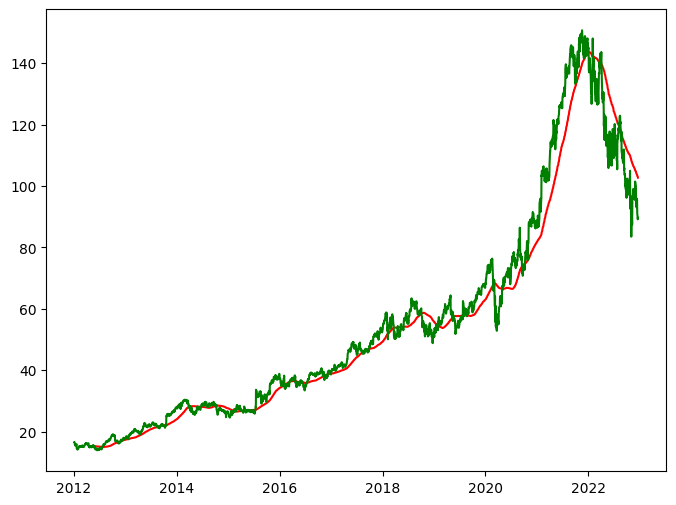

In [33]:
plt.figure(figsize=(8,6))
plt.plot(mov_avg_of_100days, 'r')
plt.plot(data.Close , 'g')
plt.show()

In [34]:
mov_avg_of_200days= data.Close.rolling(200).mean()

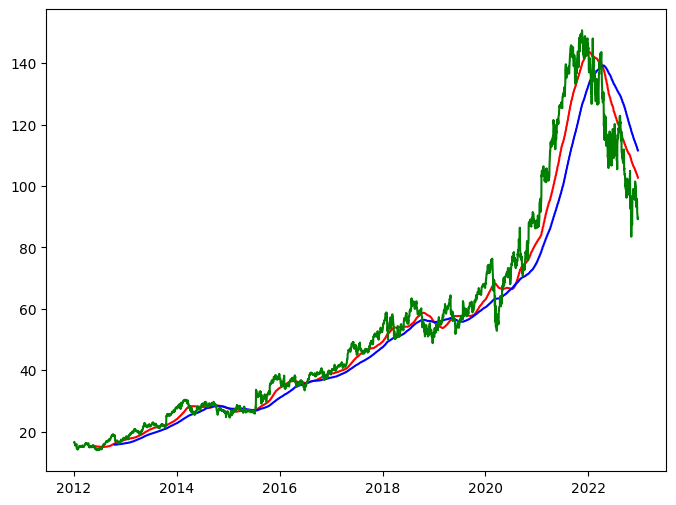

In [35]:
plt.figure(figsize=(8,6))
plt.plot(mov_avg_of_100days, 'r')
plt.plot(mov_avg_of_200days, 'b')
plt.plot(data.Close , 'g')
plt.show()

In [36]:
data.dropna(inplace=True)

In [37]:
data_train= pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80) : len(data)])

In [38]:
data_train.shape[0]

2208

In [39]:
data_test.shape[0]

553

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [41]:
scaler

MinMaxScaler()

In [42]:
data_train_scale = scaler.fit_transform(data_train)

In [43]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [48]:
#from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.layers import Dense, Dropout, LSTM



ModuleNotFoundError: No module named 'keras.src.activations.activations'; 'keras.src.activations' is not a package